# Предсказание количества кликов в 2gis с помощью линейной регрессии

Описание используемых данных<br>

**AddressCount** – количество кликов в адреса и/или входы.<br>
**CallsCount** – количество звонков в организации.<br>
**FirmsCount** – количество организаций в той или иной сфере.<br>
**GeoPart** – доля трафика с карты.<br>
**MobilePart** – доля трафика с мобильных продуктов.<br>
**UsersCount** – количество уникальных пользователей, которые совершали какие–то действия в
данной сфере – открывали карточки организаций, тыкали во вход/адрес звонок и т.д.<br>
**Distance** – Медианная дистанция от пользователя до организации при совершении клика.<br>
**IsGeo** – признак геозависимой сферы:<br>
1 – геозависимая сфера;<br>
0 – геонезависимая сфера (по экспертной разметке).

Задача: построить линейную регрессионную модель, которая позволяет прогнозировать количество кликов в организации той или иной рубрики (переменная **ClicksCount**).

Расчеты выполнялись в Python. Импортируем нужные библиотеки, загрузим данные и посмотрим на типы признаков

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [12]:
data = pd.read_csv('Data_Projects.csv', sep=';', decimal=',')
data.head()

,AddressCount,CallsCount,ClicksCount,FirmsCount,GeoPart,MobilePart,UsersCount,Distance,IsGeo
0,156,20,1903,176,0.416104,0.535762,1125,749.966084,1
1,17,37,258,20,0.211679,0.430657,157,2289.032424,0
2,78,56,1956,185,0.349475,0.476594,1195,1423.376512,1
3,14,70,378,19,0.318718,0.463744,206,3396.566089,0
4,111,90,4089,90,0.556175,0.490573,2934,1576.514154,1


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AddressCount  79 non-null     int64  
 1   CallsCount    79 non-null     int64  
 2   ClicksCount   79 non-null     int64  
 3   FirmsCount    79 non-null     int64  
 4   GeoPart       79 non-null     float64
 5   MobilePart    79 non-null     float64
 6   UsersCount    79 non-null     int64  
 7   Distance      79 non-null     float64
 8   IsGeo         79 non-null     int64  
dtypes: float64(3), int64(6)
memory usage: 5.7 KB


Пропусков в данных нет, IsGeo - бинарный признак, остальные - числовые.

Посмотрим как признаки связаны с откликом, для этого посчитаем коэффициенты корреляции и выведем по убыванию.

In [42]:
correlations_data = data.corr()['ClicksCount'].sort_values(ascending=False)
correlations_data

ClicksCount     1.000000
UsersCount      0.974676
AddressCount    0.911155
CallsCount      0.838606
FirmsCount      0.714979
MobilePart      0.416174
IsGeo           0.308041
GeoPart         0.243448
Distance       -0.360231
Name: ClicksCount, dtype: float64

Как видим, наиболее сильная связь с откликом ClicksCount у признаков UsersCount, AddressCount, CallsCount, FirmsCount. Построим для них график pairplot, показывающий отношения между парами признаков  

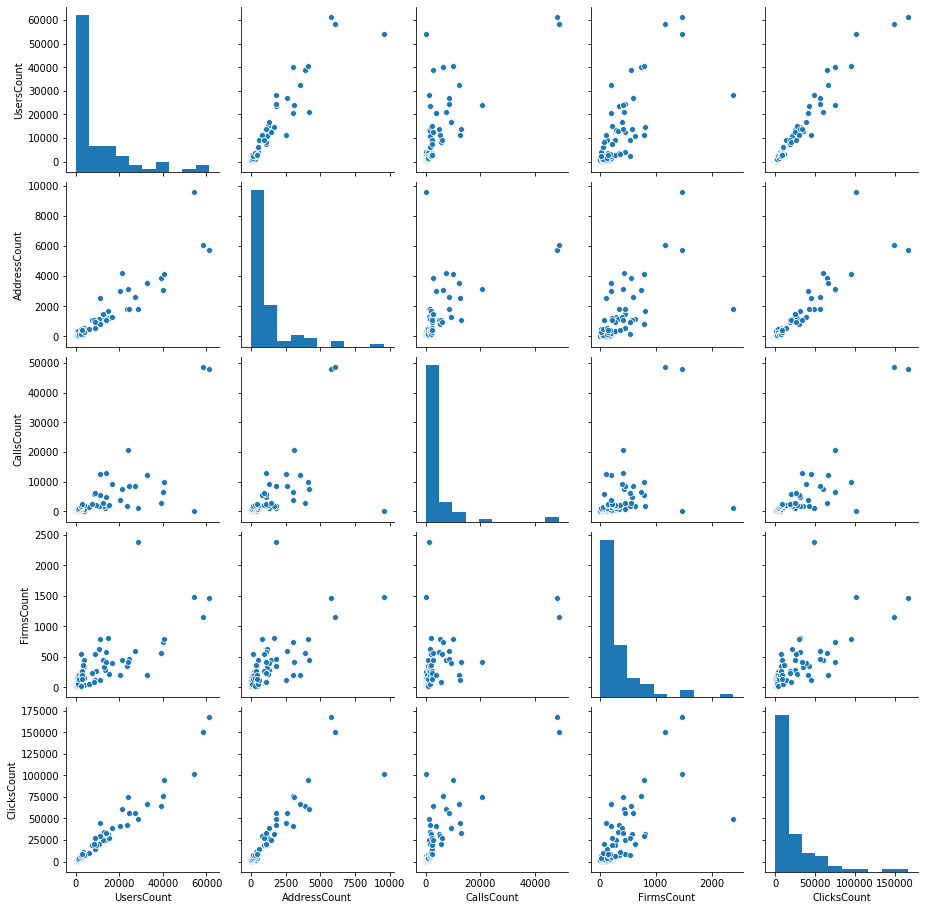

In [44]:
sns.pairplot(data[['UsersCount', 'AddressCount', 'CallsCount', 'FirmsCount', 'ClicksCount']])

Из графиков видно, что:
- в данных есть выбросы
- признаки 'UsersCount', 'AddressCount' связаны между собой

Исключим AddressCount и посмотрим на корреляцию оставшихся признаков

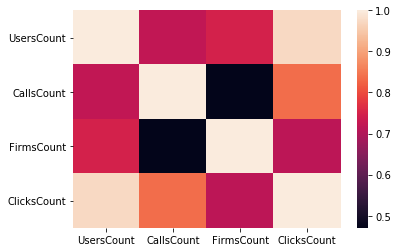

In [47]:
sns.heatmap(data[['UsersCount', 'CallsCount', 'FirmsCount', 'ClicksCount']].corr())

Построим уравнение регрессии и выведем коэффициенты

In [54]:
features = ['UsersCount', 'CallsCount', 'FirmsCount']
target = data['ClicksCount']
linear_regressor = LinearRegression()
linear_regressor.fit(data[features], target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
for i in range(len(features)):
    print(features[i], linear_regressor.coef_[i])

UsersCount 1.771897545230606
CallsCount 1.1333319296803057
FirmsCount 1.1396804216134198


Посчитаем коэффициент детерминации

In [60]:
r2_score(target, linear_regressor.predict(data[features]))

0.9880049542431276

Коэффициент детерминации близок к 1, значит, зависимость отклика от признаков сильная

Таким образом на отклик влияют (прямая линейная зависимость):
    - UsersCount – количество уникальных пользователей
    - CallsCount – количество звонков в организации
    - FirmsCount – количество организаций в той или иной сфере